In [ ]:
from heapq import heapify, heappop, heappush, heappushpop
from sklearn.utils import check_array, gen_batches, get_chunk_n_rows
from sklearn.utils.validation import check_memory
from sklearn.cluster import _hierarchical_fast as _hierarchical
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import OPTICS

## Data

In [ ]:
data = pd.read_excel('data1.xlsx')
data.head()

,x,y,label
0,8.401169,6.176239,-1
1,6.251134,7.913023,-1
2,8.268641,5.676593,-1
3,7.791409,6.145519,-1
4,5.591513,5.659804,-1


In [ ]:
data2 = pd.read_excel('data2.xlsx', names=['x', 'y'])
data2.head()

,x,y
0,7.7691,-0.91615
1,10.0190,-1.02840
2,11.0150,-0.71668
3,4.1656,-1.95480
4,7.8704,-1.34240


## Parameters

In [ ]:
eps = 0.02
minPts = 100

## Model

In [ ]:
# minPts can't be 500 since number of points in dataset is 350
op = OPTICS(min_cluster_size=minPts, eps=eps)
op.fit(data)

OPTICS(algorithm='auto', cluster_method='xi', eps=0.02, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=100, min_samples=5, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.05)

In [ ]:
# Reachability distances
op.reachability_

array([       inf, 0.30717465, 0.27768197, 0.28791378, 0.35441471,
       0.27146557, 0.30414286, 0.32343299, 0.30919248, 0.30284108,
       0.23529712, 0.24898985, 0.35679133, 0.31066867, 0.38188841,
       0.2166006 , 0.42491405, 0.36666264, 0.3368869 , 0.29743119,
       0.40232605, 0.42835516, 0.35763231, 0.47657043, 0.28227363,
       0.30850891, 0.32210632, 0.30847724, 0.29250129, 0.27768197,
       0.28093952, 0.31617155, 0.2289146 , 0.38439487, 0.27019411,
       0.32091275, 0.32912602, 0.36506075, 0.44339224, 0.35247833,
       0.41848845, 0.35226375, 0.42491405, 0.2984491 , 0.29743119,
       0.33097638, 0.23646755, 0.41824765, 0.36060765, 0.38820647,
       0.43671066, 0.27854558, 0.32163449, 0.27846842, 0.39431381,
       0.46104424, 0.27513323, 0.36781622, 0.27823878, 0.39807273,
       0.39569928, 0.32405301, 0.36398577, 0.26390989, 0.35424552,
       0.31728148, 0.25898071, 0.38323938, 0.41617483, 0.39804911,
       0.29590898, 0.44339224, 0.3815977 , 0.28603373, 0.43261

In [ ]:
## Predictions
op.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

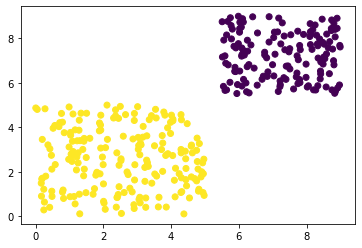

In [ ]:
plt.scatter(data['x'], data['y'], c=op.labels_)
plt.show()

## Q2

In [ ]:
op2 = OPTICS(eps=eps, min_cluster_size=500)
op2.fit(data2)

OPTICS(algorithm='auto', cluster_method='xi', eps=0.02, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=500, min_samples=5, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.05)

In [ ]:
op2.reachability_

array([       inf, 0.38027687, 0.39737329, ..., 0.4642224 , 0.22860632,
       0.33716242])

In [ ]:
op2.labels_

array([ 0,  0,  0, ..., -1, -1, -1])

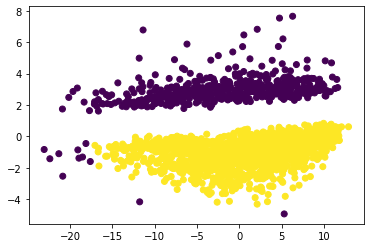

In [ ]:
plt.scatter(data2['x'], data2['y'], c=op2.labels_)
plt.show()